In [1]:
# Train RF on Validation Set and Evaluate on Train Set
import pandas as pd

In [2]:
# Get training and validation data
validation_df = pd.read_csv('../data/combined_tpm_5000genes.csv')
validation_df.head()


,ENSG00000202354,ENSG00000252316,ENSG00000201098,ENSG00000210077,ENSG00000201861,ENSG00000210195,ENSG00000210164,ENSG00000210100,ENSG00000221326,ENSG00000252866,...,ENSG00000207200,ENSG00000258557,ENSG00000278462,ENSG00000201500,ENSG00000233952,ENSG00000255338,ENSG00000263050,ENSG00000233438,target,condition
0,8.301080,0.000000,6.578953,7.284720,10.050339,9.663276,9.298792,7.284720,0.000000,0.000000,...,0.000000,0.0,6.346518,0.000000,0.000000,0.000000,0.000000,0.000000,1,Cancer
1,7.235644,0.000000,7.088922,0.000000,0.000000,7.860293,9.398104,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,4.892588,0.000000,0.000000,5.248669,1,Cancer
2,7.101411,0.000000,6.954790,9.656556,0.000000,9.720608,11.583190,11.562135,9.306141,10.220181,...,0.000000,0.0,0.000000,9.479911,0.000000,0.000000,0.000000,0.000000,1,Cancer
3,0.000000,8.353775,7.536968,7.250340,0.000000,11.112970,10.722181,8.828972,0.000000,0.000000,...,6.622607,0.0,0.000000,0.000000,5.903346,4.551159,5.588494,5.283592,1,Cancer
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.512152,9.485181,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,4.597276,0.000000,0.000000,4.950857,1,Cancer


In [3]:
len(validation_df)

128

In [4]:
training_df = pd.read_csv('../data/validation_dataset.csv')
training_df.head()

,ENSG00000202354,ENSG00000252316,ENSG00000201098,ENSG00000210077,ENSG00000201861,ENSG00000210195,ENSG00000210164,ENSG00000210100,ENSG00000221326,ENSG00000252866,...,ENSG00000207200,ENSG00000258557,ENSG00000278462,ENSG00000201500,ENSG00000233952,ENSG00000255338,ENSG00000263050,ENSG00000233438,target,condition
0,8.738094,6.516095,10.173170,12.334515,7.299977,7.051729,8.003379,9.563554,0.000000,0.000000,...,7.352596,0.000000,6.051838,0.0,4.115645,5.834589,4.365775,5.026866,1,Cancer
1,9.259342,8.127225,9.888363,11.262047,7.918578,10.400658,7.045555,10.014927,0.000000,0.000000,...,0.000000,6.332712,0.000000,0.0,6.405818,0.000000,0.000000,0.000000,1,Cancer
2,10.940283,10.121417,11.929669,12.351723,12.583328,9.248027,8.621289,10.404979,8.250397,10.576746,...,0.000000,5.921726,0.000000,0.0,5.678254,4.893375,0.000000,0.000000,1,Cancer
3,11.411087,10.560377,10.647032,13.772928,9.352177,10.685828,9.059627,10.451927,0.000000,9.432228,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,4.919642,1,Cancer
4,13.141833,10.926097,11.734956,13.591734,9.525216,10.466943,9.010617,10.210366,0.000000,8.385355,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,5.746284,3.920627,1,Cancer


In [5]:
# Split features and class labels
x_train = training_df.iloc[:, :5000]
y_train = training_df['target']

x_valid = validation_df.iloc[:, :5000]
y_valid = validation_df['target']

x_train.head()

,ENSG00000202354,ENSG00000252316,ENSG00000201098,ENSG00000210077,ENSG00000201861,ENSG00000210195,ENSG00000210164,ENSG00000210100,ENSG00000221326,ENSG00000252866,...,ENSG00000249520,ENSG00000269919,ENSG00000207200,ENSG00000258557,ENSG00000278462,ENSG00000201500,ENSG00000233952,ENSG00000255338,ENSG00000263050,ENSG00000233438
0,8.738094,6.516095,10.173170,12.334515,7.299977,7.051729,8.003379,9.563554,0.000000,0.000000,...,4.718990,4.332126,7.352596,0.000000,6.051838,0.0,4.115645,5.834589,4.365775,5.026866
1,9.259342,8.127225,9.888363,11.262047,7.918578,10.400658,7.045555,10.014927,0.000000,0.000000,...,7.032978,0.000000,0.000000,6.332712,0.000000,0.0,6.405818,0.000000,0.000000,0.000000
2,10.940283,10.121417,11.929669,12.351723,12.583328,9.248027,8.621289,10.404979,8.250397,10.576746,...,5.319604,0.000000,0.000000,5.921726,0.000000,0.0,5.678254,4.893375,0.000000,0.000000
3,11.411087,10.560377,10.647032,13.772928,9.352177,10.685828,9.059627,10.451927,0.000000,9.432228,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,4.919642
4,13.141833,10.926097,11.734956,13.591734,9.525216,10.466943,9.010617,10.210366,0.000000,8.385355,...,5.130050,5.711566,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,5.746284,3.920627


In [6]:
y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [7]:
# Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_classifier = RandomForestClassifier(n_estimators=1, random_state=42, class_weight='balanced')
rf_classifier.fit(x_train, y_train) # Train RF Classifier on Training Set

y_valid_pred = rf_classifier.predict(x_valid) # Predict on Valdation Set
y_train_pred = rf_classifier.predict(x_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
metrics = classification_report(y_valid, y_valid_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {valid_accuracy}")
print(f"Classification Report on Validation Set:\n {metrics}")

Train Accuracy: 0.8260869565217391
Validation Accuracy: 0.421875
Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.22      0.50      0.30        32
           1       0.70      0.40      0.51        96

    accuracy                           0.42       128
   macro avg       0.46      0.45      0.40       128
weighted avg       0.58      0.42      0.46       128



In [8]:
# Perform k-fold cross-validation. Set k=5
from sklearn.model_selection import cross_val_score, StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_classifier, x_train, y_train, cv=kfold, scoring='accuracy')

print(f"K-Fold Accuracies:", cv_scores)
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()} +/- {cv_scores.std()}")

K-Fold Accuracies: [0.48484848 0.5625     0.5        0.59375    0.53125   ]
Mean Cross-Validation Accuracy: 0.5344696969696969 +/- 0.039901487103798296


In [9]:
# Hyperparameter Tuning with Grid Search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(x_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Hyperparameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.6210227272727272


In [10]:
# Test the Best Model on the Validation Set
best_rf = grid_search.best_estimator_
y_valid_best_pred = best_rf.predict(x_valid)

best_valid_accuracy = accuracy_score(y_valid, y_valid_best_pred)
best_metrics = classification_report(y_valid, y_valid_best_pred)

print(f"Validation Accuracy (Best Model): {best_valid_accuracy}")
print(f"Classification Report (Best Model):\n{best_metrics}")

Validation Accuracy (Best Model): 0.6015625
Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.29      0.41      0.34        32
           1       0.77      0.67      0.72        96

    accuracy                           0.60       128
   macro avg       0.53      0.54      0.53       128
weighted avg       0.65      0.60      0.62       128



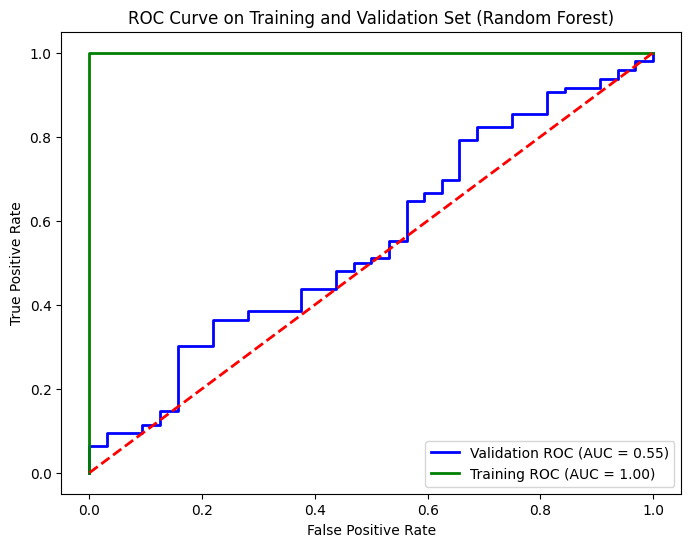

In [11]:
# Plot ROC Curves for Training and Validation Sets
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Validation set ROC
y_valid_proba = best_rf.predict_proba(x_valid)[:, 1]
fpr_valid, tpr_valid, _ = roc_curve(y_valid, y_valid_proba)
roc_auc_valid = auc(fpr_valid, tpr_valid)

# Training set ROC
y_train_proba = best_rf.predict_proba(x_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

plt.figure(figsize=(8, 6))
plt.plot(fpr_valid, tpr_valid, color='b', lw=2, label=f'Validation ROC (AUC = {roc_auc_valid:.2f})')
plt.plot(fpr_train, tpr_train, color='g', lw=2, label=f'Training ROC (AUC = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Training and Validation Set (Random Forest)')
plt.legend(loc="lower right")
plt.show()

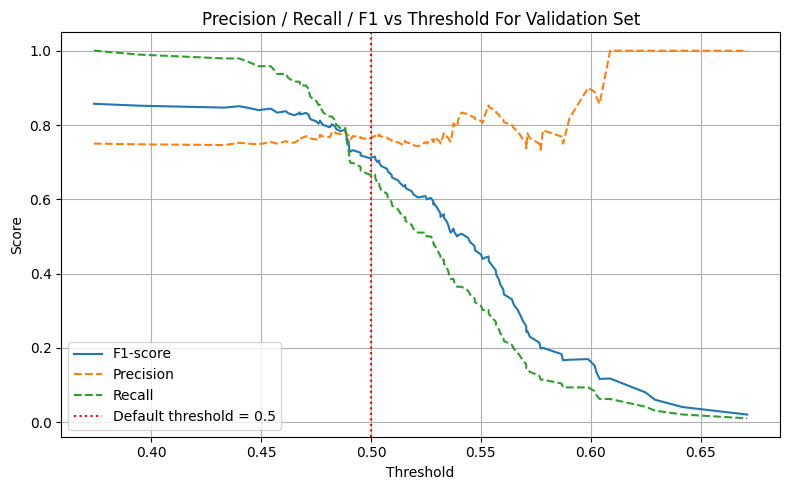

In [12]:
# Plot Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

prec, rec, thresholds = precision_recall_curve(y_valid, y_valid_proba)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-10)

plt.figure(figsize=(8,5))
plt.plot(thresholds, f1_scores[:-1], label="F1-score")
plt.plot(thresholds, prec[:-1], label="Precision", linestyle="--")
plt.plot(thresholds, rec[:-1], label="Recall", linestyle="--")
plt.axvline(0.5, color='red', linestyle=':', label="Default threshold = 0.5")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision / Recall / F1 vs Threshold For Validation Set")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()